In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
application_train = pd.read_csv("../input/home-credit-default-risk/application_train.csv")
application_test = pd.read_csv("../input/home-credit-default-risk/application_test.csv")

In [3]:
columns_description = pd.read_csv("../input/home-credit-default-risk/HomeCredit_columns_description.csv", encoding='Latin-1')
columns_description[columns_description['Table'] == "application_{train|test}.csv"]

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [4]:
application_train.shape

(307511, 122)

In [5]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


In [6]:
temp_df = pd.DataFrame(application_train.count(), columns=['Total'])
temp_df['% of missing values'] = application_train.isnull().sum() / application_train.shape[0] * 100
temp_df.sort_values(ascending=False, by='% of missing values')

,Total,% of missing values
COMMONAREA_MEDI,92646,69.872
COMMONAREA_AVG,92646,69.872
COMMONAREA_MODE,92646,69.872
NONLIVINGAPARTMENTS_MODE,93997,69.433
NONLIVINGAPARTMENTS_AVG,93997,69.433
NONLIVINGAPARTMENTS_MEDI,93997,69.433
FONDKAPREMONT_MODE,97216,68.386
LIVINGAPARTMENTS_MODE,97312,68.355
LIVINGAPARTMENTS_AVG,97312,68.355
LIVINGAPARTMENTS_MEDI,97312,68.355


In [7]:
# Drop columns having more than 60% missing values
application_train.dropna(thresh=application_train.shape[0] * 0.4, axis=1, inplace=True)

In [8]:
application_train.shape

(307511, 105)

In [9]:
#drop columns that sound not help much
application_train.drop(['FLAG_PHONE', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                  'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                  'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG',
                   'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
                   'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE',
                   'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE',
                   'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
                   'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
                   'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
                   'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
                   'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
                   'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                   'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                   'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1, inplace=True)

In [10]:
application_train.shape

(307511, 55)

In [11]:
# Number of each type of column
application_train.dtypes.value_counts()

int64      33
object     12
float64    10
dtype: int64

In [12]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

Text(0.5, 1.0, 'Loan repayed or not')

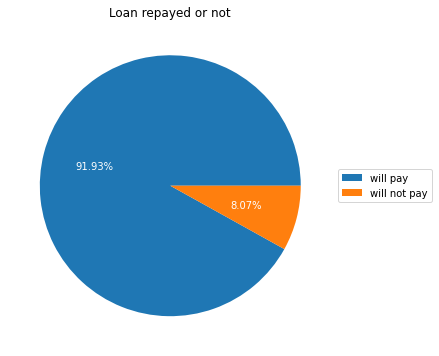

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
data = application_train['TARGET'].value_counts().values

wedges, pct, autotexts = ax.pie(data, autopct='%.2f%%', textprops=dict(color="w"))

ax.legend(wedges, ['will pay', 'will not pay'],
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Loan repayed or not", )

As we can see, data is highly imbalanced

In [14]:
def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])
    if len(data[xtick].unique()) < 5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique()) > 5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)
    
    plt.ylabel('Loans')
    plt.title('Number of loans approved vs rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
    plt.show()

def univariate_barplots(data, col1, col2='TARGET', sort=False):
    temp = pd.DataFrame(application_train.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    temp['total'] = pd.DataFrame(application_train.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(application_train.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    if sort == False:
        temp.sort_values(by=['total'],inplace=True, ascending=False)

    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp)

# **Types of loans**

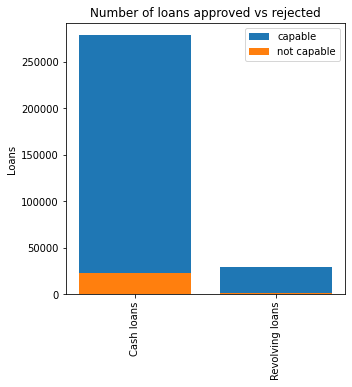

  NAME_CONTRACT_TYPE  TARGET   total   Avg
0         Cash loans   23221  278232 0.083
1    Revolving loans    1604   29279 0.055


In [15]:
univariate_barplots(application_train, 'NAME_CONTRACT_TYPE', 'TARGET', False)

* Revolving loans : Arrangement which allows for the loan amount to be withdrawn, repaid, and redrawn again in any manner and any number of times, until the arrangement expires. Credit card loans and overdrafts are revolving loans.
* Most of the loans are Cash loans

# **Gender of clients**

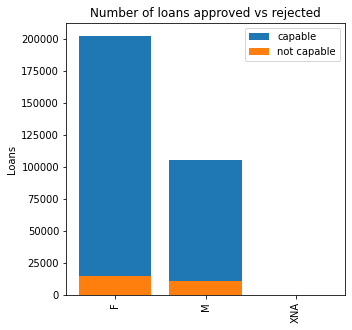

  CODE_GENDER  TARGET   total   Avg
0           F   14170  202448 0.070
1           M   10655  105059 0.101
2         XNA       0       4 0.000


In [16]:
univariate_barplots(application_train, 'CODE_GENDER', 'TARGET', False)

* We can see that women took more number of loans when compared to men. Number of men who took loans is about half of the women who did that.
* There are 4 entries gender 'XNA'. Because it seems not to provide any information, we can remove it later on.

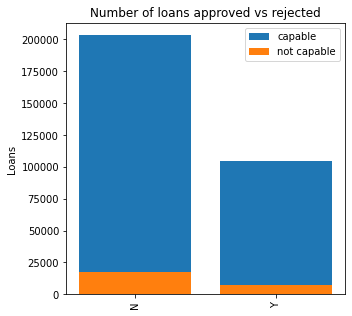

  FLAG_OWN_CAR  TARGET   total   Avg
0            N   17249  202924 0.085
1            Y    7576  104587 0.072


In [17]:
univariate_barplots(application_train, 'FLAG_OWN_CAR', 'TARGET', False)

* Most of the clients do not own car.
* Since there is not much difference in the loan repayment status (8.5% and 7.2% respectively), we can conclude that this feature is not very useful

In [18]:
columns_to_drop = []
columns_to_drop.append('FLAG_OWN_CAR')

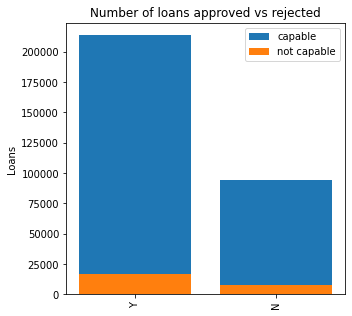

  FLAG_OWN_REALTY  TARGET   total   Avg
1               Y   16983  213312 0.080
0               N    7842   94199 0.083


In [19]:
univariate_barplots(application_train, 'FLAG_OWN_REALTY', 'TARGET', False)

* In contrast with the car owning, most of the clients own a house/flat.
* However, again, when taking a glance at the figures, we can conclude that this feature is not very useful.

In [20]:
columns_to_drop.append('FLAG_OWN_REALTY')

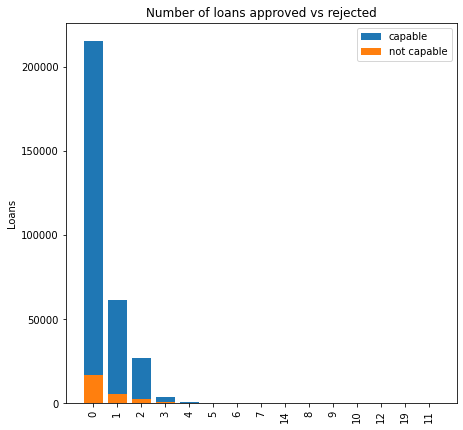

    CNT_CHILDREN  TARGET   total   Avg
0              0   16609  215371 0.077
1              1    5454   61119 0.089
2              2    2333   26749 0.087
3              3     358    3717 0.096
4              4      55     429 0.128
5              5       7      84 0.083
6              6       6      21 0.286
7              7       0       7 0.000
13            14       0       3 0.000
8              8       0       2 0.000
9              9       2       2 1.000
10            10       0       2 0.000
12            12       0       2 0.000
14            19       0       2 0.000
11            11       1       1 1.000


In [21]:
univariate_barplots(application_train, 'CNT_CHILDREN', 'TARGET', False)

* The clients who have no children account for the highest number of loans
* However, again, the figures tell that this feature is not very useful

In [22]:
columns_to_drop.append('CNT_CHILDREN')

In [23]:
income_approved = application_train[application_train['TARGET'] == 0]['AMT_INCOME_TOTAL']
income_rejected = application_train[application_train['TARGET'] == 1]['AMT_INCOME_TOTAL']
income_approved_pct = income_approved.describe(percentiles=[0.01 * i for i in range(0, 100, 5)])
income_rejected_pct = income_rejected.describe(percentiles=[0.01 * i for i in range(0, 100, 5)])
income_percentiles = pd.DataFrame(data=[income_approved_pct, income_rejected_pct], index=['Approved Loans', 'Rejected Loans']).T
income_percentiles

,Approved Loans,Rejected Loans
count,282686.000,24825.000
mean,169077.722,165611.761
std,110476.269,746676.959
min,25650.000,25650.000
0%,25650.000,25650.000
5%,67500.000,67500.000
10%,81000.000,81000.000
15%,90000.000,90000.000
20%,99000.000,99000.000
25%,112500.000,112500.000


* It's surprising that till the 45th percentile, there is not much difference between the values at the same percentile.

Text(0.5, 1.0, 'Total income of clients who are capable of repayment')

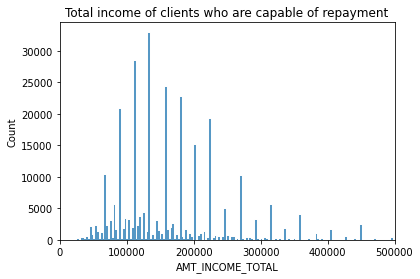

In [24]:
fig, ax = plt.subplots()
sns.histplot(income_approved)
ax.set_xlim(0, 0.5e6)
ax.set_title("Total income of clients who are capable of repayment")

Text(0.5, 1.0, 'Total income of clients who are not capable of repayment')

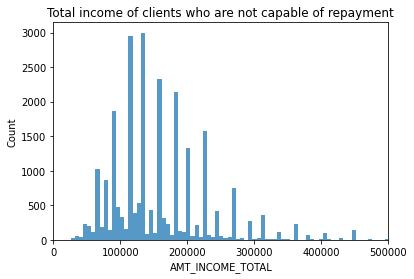

In [25]:
fig, ax = plt.subplots()
sns.histplot(income_rejected)
ax.set_xlim(0, 0.5e6)
ax.set_title("Total income of clients who are not capable of repayment")

* It implies that this feature has not much influence on the repayment status of the loans

In [26]:
columns_to_drop.append('AMT_INCOME_TOTAL')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


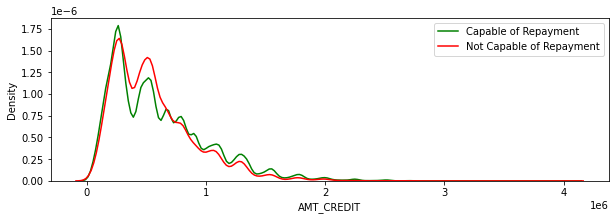

In [27]:
credit_approved = application_train[application_train['TARGET'] == 0]['AMT_CREDIT']
credit_rejected = application_train[application_train['TARGET'] == 1]['AMT_CREDIT']
plt.figure(figsize=(10,3))
sns.distplot(credit_approved,hist=False,label="Capable of Repayment", color='green')
sns.distplot(credit_rejected,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


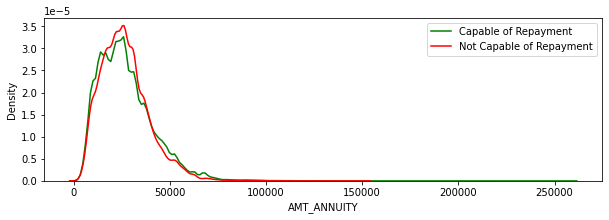

In [28]:
capable_annuity = application_train[application_train['TARGET'] == 0]['AMT_ANNUITY']
not_capable_annuity = application_train[application_train['TARGET'] == 1]['AMT_ANNUITY']
plt.figure(figsize=(10,3))
sns.distplot(capable_annuity,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_annuity,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


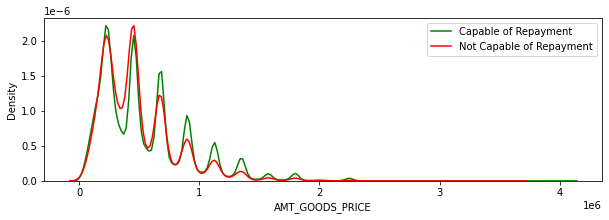

In [29]:
capable_goods_price = application_train[application_train['TARGET'] == 0]['AMT_GOODS_PRICE']
not_capable_goods_price = application_train[application_train['TARGET'] == 1]['AMT_GOODS_PRICE']
plt.figure(figsize=(10,3))
sns.distplot(capable_goods_price,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_goods_price,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

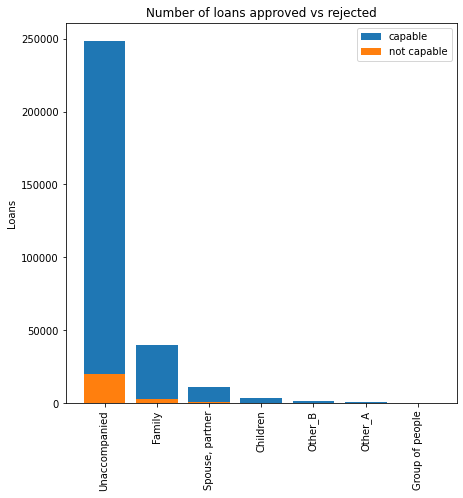

   NAME_TYPE_SUITE  TARGET   total   Avg
6    Unaccompanied   20337  248526 0.082
1           Family    3009   40149 0.075
5  Spouse, partner     895   11370 0.079
0         Children     241    3267 0.074
4          Other_B     174    1770 0.098
3          Other_A      76     866 0.088
2  Group of people      23     271 0.085


In [30]:
univariate_barplots(application_train, 'NAME_TYPE_SUITE', 'TARGET', False)

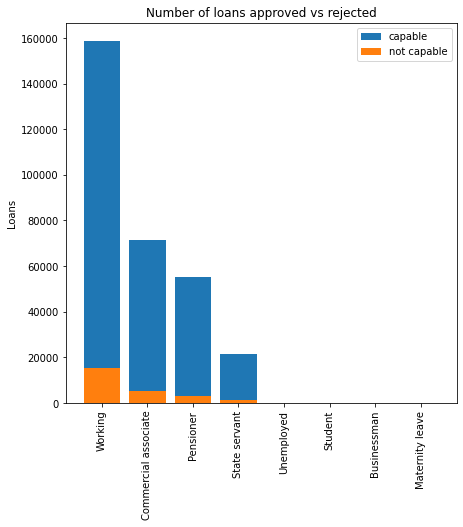

       NAME_INCOME_TYPE  TARGET   total   Avg
7               Working   15224  158774 0.096
1  Commercial associate    5360   71617 0.075
3             Pensioner    2982   55362 0.054
4         State servant    1249   21703 0.058
6            Unemployed       8      22 0.364
5               Student       0      18 0.000
0           Businessman       0      10 0.000
2       Maternity leave       2       5 0.400


In [31]:
univariate_barplots(application_train, 'NAME_INCOME_TYPE', 'TARGET', False)

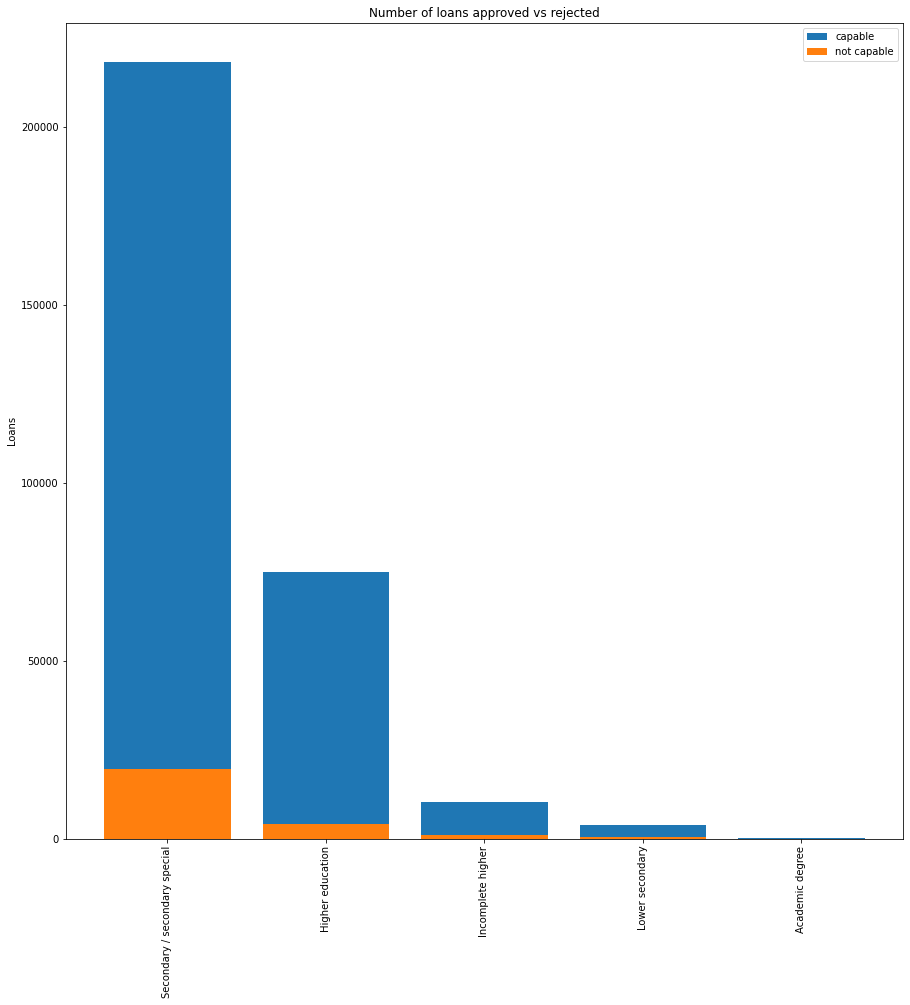

             NAME_EDUCATION_TYPE  TARGET   total   Avg
4  Secondary / secondary special   19524  218391 0.089
1               Higher education    4009   74863 0.054
2              Incomplete higher     872   10277 0.085
3                Lower secondary     417    3816 0.109
0                Academic degree       3     164 0.018


In [32]:
univariate_barplots(application_train, 'NAME_EDUCATION_TYPE', 'TARGET', False)

* People with Secondary/Secondary Special as the highest level of education apply for mostnumber of loans and they are also the highest defaulters. However, the default percentage is not very different across various education levels.

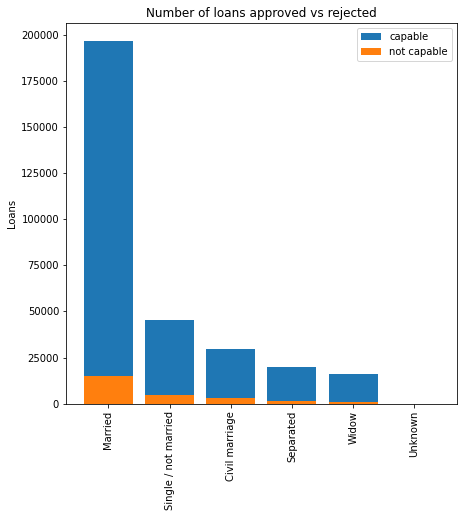

     NAME_FAMILY_STATUS  TARGET   total   Avg
1               Married   14850  196432 0.076
3  Single / not married    4457   45444 0.098
0        Civil marriage    2961   29775 0.099
2             Separated    1620   19770 0.082
5                 Widow     937   16088 0.058
4               Unknown       0       2 0.000


In [33]:
univariate_barplots(application_train, 'NAME_FAMILY_STATUS', 'TARGET', False)

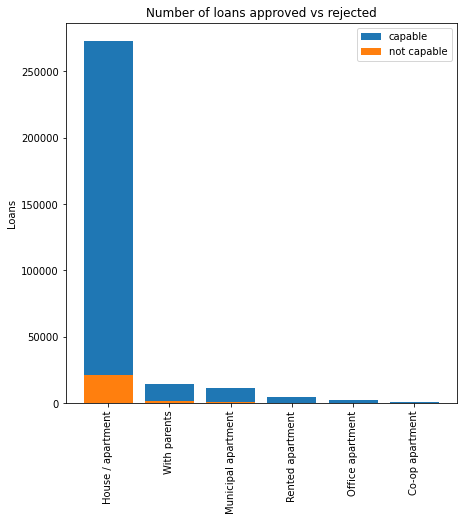

     NAME_HOUSING_TYPE  TARGET   total   Avg
1    House / apartment   21272  272868 0.078
5         With parents    1736   14840 0.117
2  Municipal apartment     955   11183 0.085
4     Rented apartment     601    4881 0.123
3     Office apartment     172    2617 0.066
0      Co-op apartment      89    1122 0.079


In [34]:
univariate_barplots(application_train, 'NAME_HOUSING_TYPE', 'TARGET', False)

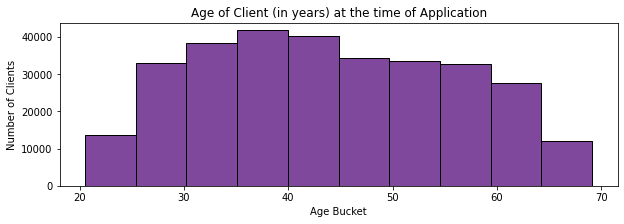

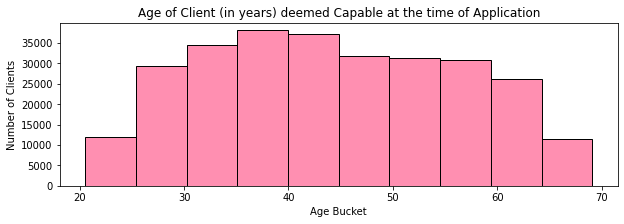

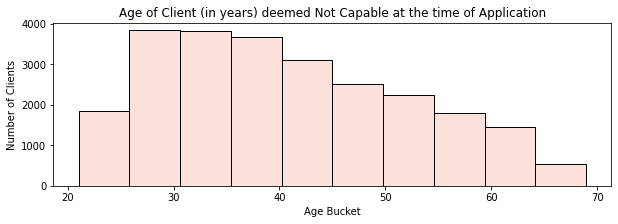

In [35]:
capable_days_birth = - application_train[application_train['TARGET'] == 0]['DAYS_BIRTH'].values / 365
not_capable_days_birth = - application_train[application_train['TARGET'] == 1]['DAYS_BIRTH'].values / 365

plt.figure(figsize=(10,3))
plt.hist(- application_train['DAYS_BIRTH'].values / 365, bins=10, edgecolor='black', color='#80489C')
plt.title('Age of Client (in years) at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(capable_days_birth, bins=10, edgecolor='black', color='#FF8FB1')
plt.title('Age of Client (in years) deemed Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(not_capable_days_birth, bins=10, edgecolor='black', color='#FCE2DB')
plt.title('Age of Client (in years) deemed Not Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

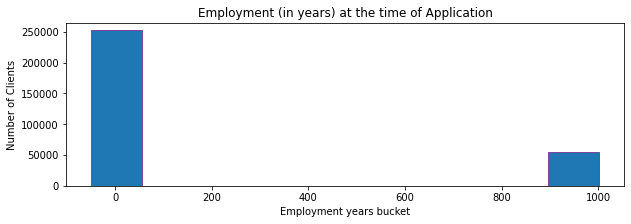

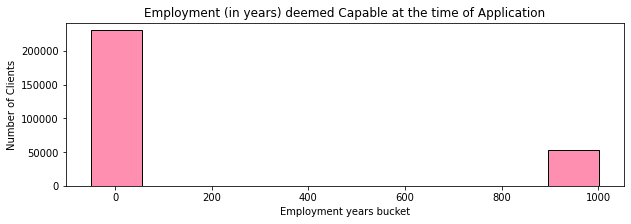

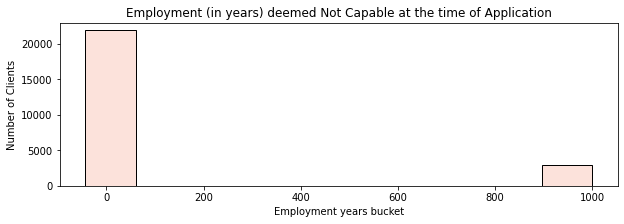

In [36]:
capable_days_employed = application_train[application_train['TARGET']==0]['DAYS_EMPLOYED'].values / 365
not_capable_days_employed = application_train[application_train['TARGET']==1]['DAYS_EMPLOYED'].values / 365
plt.figure(figsize=(10,3))
plt.hist(application_train['DAYS_EMPLOYED'].values / 365, bins=10, edgecolor='#80489C')
plt.title('Employment (in years) at the time of Application')
plt.xlabel('Employment years bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(capable_days_employed, bins=10, edgecolor='black', color='#FF8FB1')
plt.title('Employment (in years) deemed Capable at the time of Application')
plt.xlabel('Employment years bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(not_capable_days_employed, bins=10, edgecolor='black', color='#FCE2DB')
plt.title('Employment (in years) deemed Not Capable at the time of Application')
plt.xlabel('Employment years bucket')
plt.ylabel('Number of Clients')
plt.show()

* Here also, we have already converted the days into years for easy analysis, and we can seefrom the histogram that there are some clients that have worked for 1000 years.
* This is clearly impossible and is an outlier, which we will deal with later.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


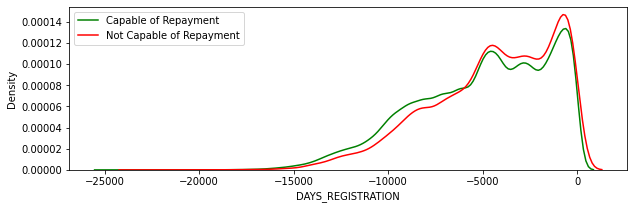

In [37]:
capable_days_registration = application_train[application_train['TARGET']==0]['DAYS_REGISTRATION']
not_capable_days_registration = application_train[application_train['TARGET']==1]['DAYS_REGISTRATION']

plt.figure(figsize=(10,3))
sns.distplot(capable_days_registration, hist=False, label="Capable of Repayment", color='green')
sns.distplot(not_capable_days_registration, hist=False, label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


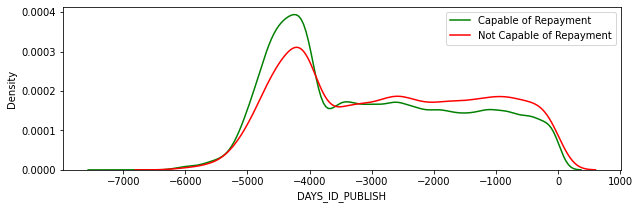

In [38]:
capable_days_id_publish = application_train[application_train['TARGET']==0]['DAYS_ID_PUBLISH']
not_capable_days_id_publish = application_train[application_train['TARGET']==1]['DAYS_ID_PUBLISH']

plt.figure(figsize=(10,3))
sns.distplot(capable_days_id_publish, hist=False, label="Capable of Repayment", color='green')
sns.distplot(not_capable_days_id_publish, hist=False, label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

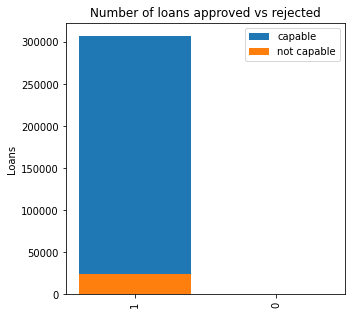

   FLAG_MOBIL  TARGET   total   Avg
1           1   24825  307510 0.081
0           0       0       1 0.000


In [39]:
univariate_barplots(application_train, 'FLAG_MOBIL', 'TARGET', False)

* There is only 1 client in the training data that does not own a Mobile Phone

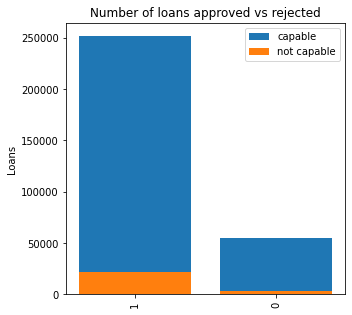

   FLAG_EMP_PHONE  TARGET   total   Avg
1               1   21834  252125 0.087
0               0    2991   55386 0.054


In [40]:
univariate_barplots(application_train, 'FLAG_EMP_PHONE', 'TARGET', False)

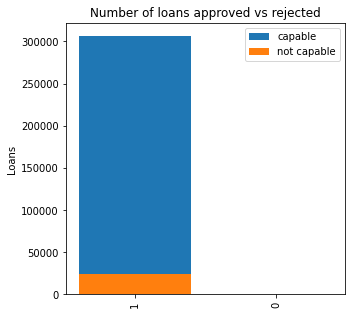

   FLAG_CONT_MOBILE  TARGET   total   Avg
1                 1   24780  306937 0.081
0                 0      45     574 0.078


In [41]:
univariate_barplots(application_train, 'FLAG_CONT_MOBILE', 'TARGET', False)

* Most clients had their phone reachable.

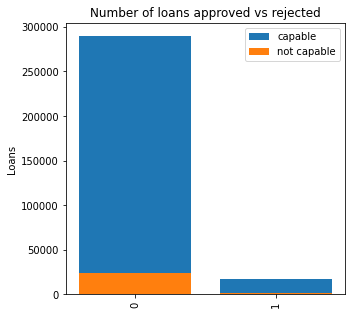

   FLAG_EMAIL  TARGET   total   Avg
0           0   23451  290069 0.081
1           1    1374   17442 0.079


In [42]:
univariate_barplots(application_train, 'FLAG_EMAIL', 'TARGET', False)

* Most clients did not provide their emails.

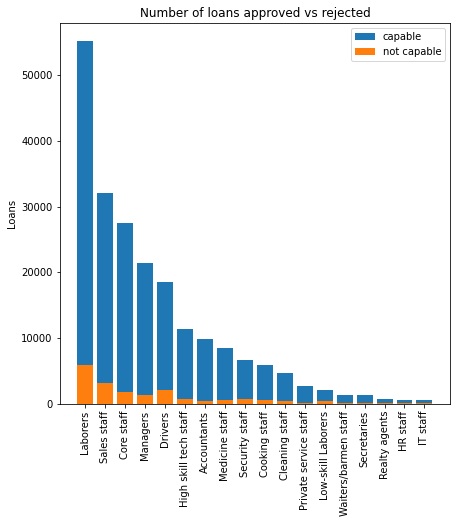

          OCCUPATION_TYPE  TARGET  total   Avg
8                Laborers    5838  55186 0.106
14            Sales staff    3092  32102 0.096
3              Core staff    1738  27570 0.063
10               Managers    1328  21371 0.062
4                 Drivers    2107  18603 0.113
6   High skill tech staff     701  11380 0.062
0             Accountants     474   9813 0.048
11         Medicine staff     572   8537 0.067
16         Security staff     722   6721 0.107
2           Cooking staff     621   5946 0.104
1          Cleaning staff     447   4653 0.096
12  Private service staff     175   2652 0.066
9      Low-skill Laborers     359   2093 0.172
17   Waiters/barmen staff     152   1348 0.113
15            Secretaries      92   1305 0.070
13          Realty agents      59    751 0.079
5                HR staff      36    563 0.064
7                IT staff      34    526 0.065


In [43]:
univariate_barplots(application_train, 'OCCUPATION_TYPE', 'TARGET', False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


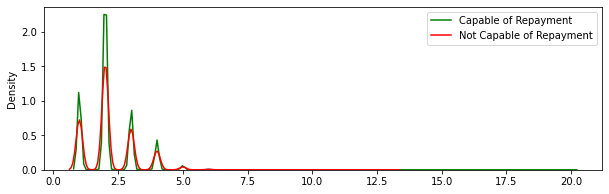

In [44]:
capable_family_members = application_train[application_train['TARGET']==0]['CNT_FAM_MEMBERS'].values
not_capable_family_members = application_train[application_train['TARGET']==1]['CNT_FAM_MEMBERS'].values
plt.figure(figsize=(10,3))
sns.distplot(capable_family_members,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_family_members,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

* Most of the applicants have 2 Family Members and there are very few applicants with >5family members.


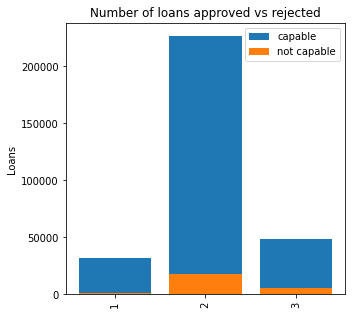

   REGION_RATING_CLIENT  TARGET   total   Avg
0                     1    1552   32197 0.048
1                     2   17907  226984 0.079
2                     3    5366   48330 0.111


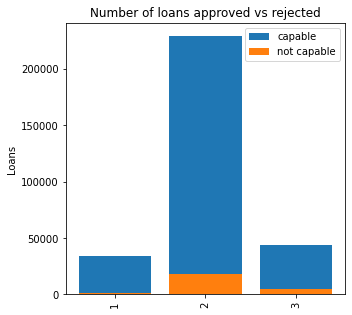

   REGION_RATING_CLIENT_W_CITY  TARGET   total   Avg
0                            1    1654   34167 0.048
1                            2   18170  229484 0.079
2                            3    5001   43860 0.114


In [45]:
univariate_barplots(application_train, 'REGION_RATING_CLIENT', 'TARGET', True)
univariate_barplots(application_train, 'REGION_RATING_CLIENT_W_CITY', 'TARGET', True)

* The rating of region and rating of city are almost the same.

In [46]:
columns_to_drop.append('REGION_RATING_CLIENT')
columns_to_drop.append('REGION_RATING_CLIENT_W_CITY')

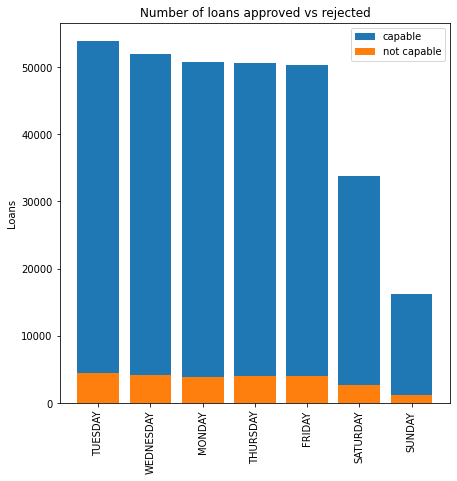

  WEEKDAY_APPR_PROCESS_START  TARGET  total   Avg
5                    TUESDAY    4501  53901 0.084
6                  WEDNESDAY    4238  51934 0.082
1                     MONDAY    3934  50714 0.078
4                   THURSDAY    4098  50591 0.081
0                     FRIDAY    4101  50338 0.081
2                   SATURDAY    2670  33852 0.079
3                     SUNDAY    1283  16181 0.079


In [47]:
univariate_barplots(application_train, 'WEEKDAY_APPR_PROCESS_START', 'TARGET', False)

* This is very interesting because the number of applications are spread almost uniformly throughout the weekdays (Monday-Friday),whereas the number of applications are lower in the weekend.

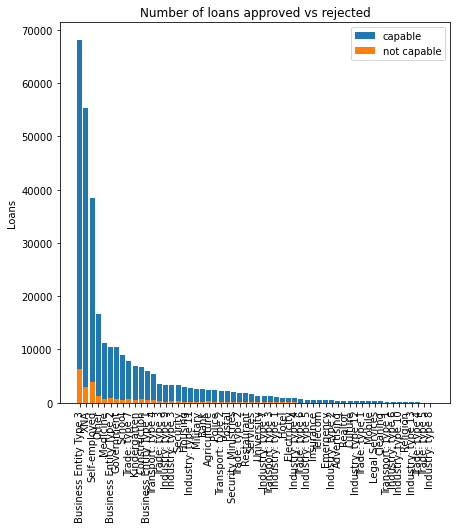

         ORGANIZATION_TYPE  TARGET  total   Avg
5   Business Entity Type 3    6323  67992 0.093
57                     XNA    2990  55374 0.054
42           Self-employed    3908  38412 0.102
33                   Other    1275  16683 0.076
30                Medicine     737  11193 0.066
4   Business Entity Type 2     900  10553 0.085
11              Government     726  10404 0.070
39                  School     526   8893 0.059
51           Trade: type 7     740   7831 0.094
28            Kindergarten     484   6880 0.070
7             Construction     785   6721 0.117
3   Business Entity Type 1     487   5984 0.081
55       Transport: type 4     501   5398 0.093
47           Trade: type 3     361   3492 0.103
26        Industry: type 9     225   3368 0.067
20        Industry: type 3     348   3278 0.106
40                Security     324   3247 0.100
13                 Housing     235   2958 0.079
16       Industry: type 11     234   2704 0.087
31                Military     135   263

In [48]:
univariate_barplots(application_train, 'ORGANIZATION_TYPE', 'TARGET', False)

* Business people and XNA (No information provided) are the highest number of applicants.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


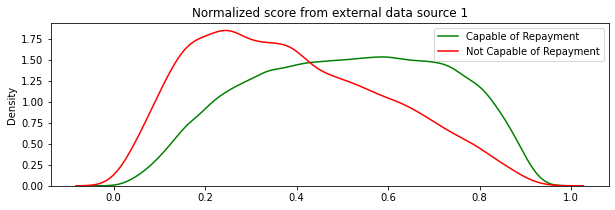

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


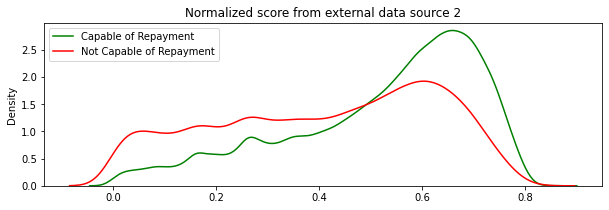

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


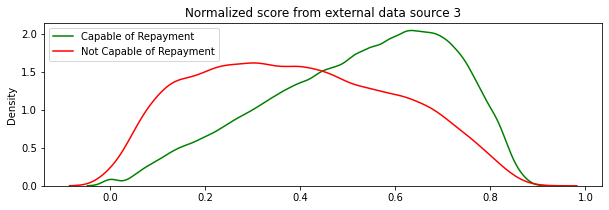

In [49]:
capable_ext_source_1 = application_train[application_train['TARGET']==0]['EXT_SOURCE_1'].values
not_capable_ext_source_1 = application_train[application_train['TARGET']==1]['EXT_SOURCE_1'].values
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_1, hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_1, hist=False,label="Not Capable of Repayment", color='red')
plt.title("Normalized score from external data source 1")
plt.legend()
plt.show()

capable_ext_source_2 = application_train[application_train['TARGET']==0]['EXT_SOURCE_2'].values
not_capable_ext_source_2 = application_train[application_train['TARGET']==1]['EXT_SOURCE_2'].values
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_2, hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_2, hist=False,label="Not Capable of Repayment", color='red')
plt.title("Normalized score from external data source 2")
plt.legend()
plt.show()

capable_ext_source_3 = application_train[application_train['TARGET']==0]['EXT_SOURCE_3'].values
not_capable_ext_source_3 = application_train[application_train['TARGET']==1]['EXT_SOURCE_3'].values
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_3, hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_3, hist=False,label="Not Capable of Repayment", color='red')
plt.title("Normalized score from external data source 3")
plt.legend()
plt.show()


In [50]:
flag_document_df = application_train.loc[:, application_train.columns.str.contains('DOCUMENT')]
flag_document_df.head()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
temp_df = pd.DataFrame(index=flag_document_df.columns)
percent_0 = []
percent_1 = []
for column in flag_document_df:
    count_0 = flag_document_df[column].value_counts()[0] / flag_document_df.shape[0] * 100
    count_1 = flag_document_df[column].value_counts()[1] / flag_document_df.shape[0] * 100
    percent_0.append(count_0)
    percent_1.append(count_1)
    
temp_df['Provided'] = percent_1
temp_df['Not Provide'] = percent_0
temp_df

,Provided,Not Provide
FLAG_DOCUMENT_2,0.004,99.996
FLAG_DOCUMENT_3,71.002,28.998
FLAG_DOCUMENT_4,0.008,99.992
FLAG_DOCUMENT_5,1.511,98.489
FLAG_DOCUMENT_6,8.806,91.194
FLAG_DOCUMENT_7,0.019,99.981
FLAG_DOCUMENT_8,8.138,91.862
FLAG_DOCUMENT_9,0.390,99.610
FLAG_DOCUMENT_10,0.002,99.998
FLAG_DOCUMENT_11,0.391,99.609


* We can see from here that the percentage of client has submitted the document is very small in most of the cases, which means that the data is highly imbalanced and its presence in the dataset is not going to help us very much.
* However, Flag_Document_3 has a good presence of number of clients provided this document and we can remove all the Flag_Document columns except this one.

# Fixing Null Values and Outliers

# Days_employed

In [52]:
application_train['DAYS_EMPLOYED'].describe()

count   307511.000
mean     63815.046
std     141275.767
min     -17912.000
25%      -2760.000
50%      -1213.000
75%       -289.000
max     365243.000
Name: DAYS_EMPLOYED, dtype: float64

The column 'Days_Employed' basically refers to the number of days before the loan application that the client started his/her first job. Since the values are almost negative, we transform the data into years and convert them to positive values to see the outliers.

In [53]:
(-application_train['DAYS_EMPLOYED'] / 365).describe(percentiles=[0.01 * i for i in range(0, 100, 5)])

count   307511.000
mean      -174.836
std        387.057
min      -1000.666
0%       -1000.666
5%       -1000.666
10%      -1000.666
15%      -1000.666
20%          0.395
25%          0.792
30%          1.255
35%          1.753
40%          2.252
45%          2.773
50%          3.323
55%          3.964
60%          4.644
65%          5.471
70%          6.471
75%          7.562
80%          8.852
85%         10.633
90%         13.373
95%         18.473
max         49.074
Name: DAYS_EMPLOYED, dtype: float64

We will remove all the negative values in the column.

In [54]:
application_train.replace(max(application_train['DAYS_EMPLOYED'].values), np.nan, inplace=True)

In [55]:
(-application_train['DAYS_EMPLOYED'] / 365).describe(percentiles=[0.01 * i for i in range(0, 100, 5)])

count   252137.000
mean         6.532
std          6.406
min         -0.000
0%           0.000
5%           0.564
10%          0.912
15%          1.282
20%          1.690
25%          2.101
30%          2.518
35%          2.959
40%          3.425
45%          3.953
50%          4.515
55%          5.126
60%          5.918
65%          6.732
70%          7.649
75%          8.699
80%         10.071
85%         11.978
90%         14.611
95%         19.975
max         49.074
Name: DAYS_EMPLOYED, dtype: float64

# Days_Registration

In [56]:
application_train['DAYS_REGISTRATION'].describe()

count   307511.000
mean     -4986.120
std       3522.886
min     -24672.000
25%      -7479.500
50%      -4504.000
75%      -2010.000
max          0.000
Name: DAYS_REGISTRATION, dtype: float64

Like Days_employed, we transform the data to check for outliers.

In [57]:
(- application_train['DAYS_REGISTRATION'] / 365).describe()

count   307511.000
mean        13.661
std          9.652
min         -0.000
25%          5.507
50%         12.340
75%         20.492
max         67.595
Name: DAYS_REGISTRATION, dtype: float64

* This shows that both the minimum as well as the maximum days of registration are admissible and there are no outliers present in the 'Days_Registration' column.


In [58]:
# replace 'XNA' value in CODE_GENDER
application_train['CODE_GENDER'].replace('XNA', 'M', inplace=True)

In [59]:
application_train['CODE_GENDER'].value_counts()

F    202448
M    105063
Name: CODE_GENDER, dtype: int64

In [60]:
# Drop columns which do not help much
application_train.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                                            'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
                                            'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                            'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1, inplace=True)

In [61]:
application_train.drop(columns_to_drop, axis=1, inplace=True)

In [62]:
application_train.shape

(307511, 30)

In [63]:
categorical_list = []
numerical_list = []
for i in application_train.columns.tolist():
    if application_train[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 10
Number of numerical features: 20


In [64]:
from sklearn.impute import SimpleImputer
# Replace missing values with the most frequent occuring
application_train[numerical_list] = SimpleImputer(strategy='most_frequent').fit_transform(application_train[numerical_list])

In [65]:
application_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   0
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
EXT_SOURCE_1                      0
EXT_SOURCE_2                

In [66]:
# Fill NaN in 2 categorical features by the most frequent values
application_train['NAME_TYPE_SUITE'].fillna(application_train['NAME_TYPE_SUITE'].value_counts().index[0], inplace=True)
application_train['OCCUPATION_TYPE'].fillna(application_train['OCCUPATION_TYPE'].value_counts().index[0], inplace=True)

In [67]:
application_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
FLAG_DOCUMENT_3               0
dtype: int64

In [68]:
application_train.shape

(307511, 30)

In [70]:
application_train.to_csv('application_train_new.csv', index=False)